<a href="https://colab.research.google.com/github/hsnam95/my/blob/main/%5BNH%5D_Python_for_Topic_Modelling_(ALL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.corpora import Dictionary

In [ ]:
from google.colab import files
files.upload()

In [3]:
df_news = pd.read_csv("a-machado-(CLEAN)-Revisado3-(solo libros)-nuevo.csv")

### 정제

In [4]:
black_list = [
                                  "a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z", # 개별 알파벳(alfabeto) 
                                       
                                 "al", "del","de","en", "hacia", "por", "para", "entre",'sobre','según', #전치사(preposiciones)
                                 "con","comigo","contigo", "consigo", "sin",

                                 'cual', 'cuál', 'cuales', 'cuáles', 'cualquier', 'cualquiera', 'cualquieras', #관계사(relativos) & 의문사(interrogativos) (2)
                                 'cuan', 'cuán', 'cuando', 'cuándo', 'cuanta','cuánta', 'cuantas', 'cuántas', 'cuanto', 'cuánto', 'cuantos', 'cuántos',   #관계사(relativos) & 의문사(interrogativos) (1)
                                 'donde', 'dónde', 'adonde', 'adónde','como', 'cómo',                                  #관계사(relativos) & 의문사(interrogativos) (3)
                                 'que', 'qué', 'quien', 'quién', 'quienes', 'quiénes','quienesquiera', 'quienquiera', #관계사(relativos) & 의문사(interrogativos) (4)
                                 'cuyo', 'cuya','cuyos','cuyas', #관계사(relativos) & 의문사(interrogativos) (4)   

                                 'el', 'la', 'las', 'le', 'les', 'lo', 'los', 'un', 'una', 'unas', 'uno', 'unos', #관사(articulos)
                                 'yo', 'me', 'mi', 'mí', 'mia', 'mía', 'mias', 'mías','mio','mío', 'mios', 'míos', 'mis', #대명사(prombres)-1S
                                 'nos', 'nosotras', 'nosotros', 'nuestra', 'nuestras', 'nuestro', 'nuestros', #대명사(prombres)-1P
                                 'vosotras', 'vosotros', 'vuestra', 'vuestras', 'vuestro', 'vuestros', 'os', #대명사(prombres)-2P
                                 'él', 'ella', 'ellas', 'ello', 'ellos', #대명사(prombres)-3S (1)
                                 'ud', 'uds', 'usted','ustedes', 'vd', 'vds', 'se', 'su', 'sus', 'suya', 'suyas', 'suyo', 'suyos', #대명사(prombres)-3S (2)
                                 'te', 'ti', 'tí', 'tu', 'tú', 'tus', 'tuya', 'tuyas', 'tuyo', 'tuyos', #대명사(prombres)-2S

                                 #'este', 'esta', 'estos', 'estas', 'ese', 'esa', 'esos', 'esas','aquel', 'aquella', 'aquellos', 'aquellas', #지시사(demostrativos)

                                 'era', 'erais', 'eramos', 'éramos', 'eran', 'eras',  #SER 동사활용형(1)
                                 'eres', 'es', 'sea', 'seáis', 'seamos', 'sean', 'seas','sois', 'somos','son', 'soy', #SER 동사활용형(2)
                                 'fue', 'fué', 'fui', 'fuí', 'fuimos', 'fuiste', 'fuisteis', #SER 동사활용형(3)
                                 'fuera', 'fuerais', 'fuéramos', 'fueran', 'fueras', 'fueron', 'fuese', 'fueseis', 'fuésemos','fuesen', 'fueses', #SER 동사활용형(4)
                                 'será', 'serán', 'serás', 'seré', 'seréis', 'seremos', #SER 동사활용형(5)
                                 'sería', 'seríais', 'seríamos', 'serían', 'serías', #SER 동사활용형(6)
                                 'sido', 'siendo', #SER 동사활용형(7)

                                 'estar', 'está', 'estais', 'estáis', 'estamos', 'estan', 'están','estás', 'estoy',  #ESTAR 동사활용형(1)
                                 'estaba', 'estabais', 'estábamos', 'estaban', 'estabas', #ESTAR 동사활용형(2)
                                 'estada', 'estadas', 'estando', 'estad', #ESTAR 동사활용형(3)
                                 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaremos', #ESTAR 동사활용형(4)
                                 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', #ESTAR 동사활용형(5)
                                 'esté', 'estéis', 'estemos', 'estén', 'estés', #ESTAR 동사활용형(6) 
                                 'estuve', 'estuviera', 'estuvierais', 'estuviéramos', 'estuvieran', 'estuvieras', 'estuvieron', #ESTAR 동사활용형(7)
                                 'estuviese', 'estuvieseis', 'estuviésemos', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuvo',  #ESTAR 동사활용형(8)

                                 'haber', 'ha', 'habéis', 'han', 'has', 'hay', 'he', 'hemos',  #HABER 동사활용형(1)
                                 'habia', 'había', 'habíais', 'habíamos', 'habían', 'habías',  #HABER 동사활용형(2)
                                 'habida', 'habidas', 'habido', 'habidos', 'habiendo',         #HABER 동사활용형(3)
                                 'habrá', 'habrán', 'habrás', 'habré', 'habréis', 'habremos',  #HABER 동사활용형(4)
                                 'habría', 'habríais', 'habríamos', 'habrían', 'habrías',      #HABER 동사활용형(5)
                                 'haya', 'hayáis', 'hayamos', 'hayan', 'hayas',                #HABER 동사활용형(6)
                                 'hube', 'hubimos', 'hubiste', 'hubisteis', 'hubo',            #HABER 동사활용형(7)
                                 'hubiera', 'hubierais', 'hubiéramos', 'hubieran', 'hubieras', 'hubieron',  #HABER 동사활용형(8) 
                                 'hubiese', 'hubieseis', 'hubiésemos', 'hubiesen', 'hubieses', #HABER 동사활용형(9) 

                                 'ni','no','jamás','nunca','nada','ningún','ninguna','ninguno', #부정어(negativos)
                                 'pero','mas', 'aunque','pues','porque','si','sí', #접속사(conjunciones)
                                 'algo','algún','alguna','algunas','alguno','algunos', #부정어(indefinidos)
                                 'embargo',                                     #기타(etc)                                                                   ))         
  
                                   "LBR",
                                   "ttl",
                                   "mtl",
                                   "ftl",
                                   "=","===============================================",
                                   "01","02","03","04","05","06","07","08","09"]

In [9]:
stop = set(stopwords.words('spanish'))
additional_stopwords=set(black_list)
stopwords = stop.union(additional_stopwords)

In [ ]:
import spacy
!python -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

In [17]:
def lemmatization(texts):
    texts_out = [token.text for token in nlp(texts) if token.text not in black_list and len(token.text)>2]
    return texts_out

In [41]:
# Detect phrases, based on collected collocation counts. Adjacent words that appear together more frequently than expected are joined together with the _ character.
bigram = gensim.models.Phrases(df_news.texto.to_list())

In [45]:
def cleaner(word):
  word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '', word, flags=re.MULTILINE)
  word = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', "", word)
  word = re.sub(r'ee.uu', 'eeuu', word)
  word = re.sub(r'\#\.', '', word)
  word = re.sub(r'\n', '', word)
  word = re.sub(r',', '', word)
  word = re.sub(r'\-', ' ', word)
  word = re.sub(r'\.{3}', ' ', word)
  word = re.sub(r'a{2,}', 'a', word)
  word = re.sub(r'é{2,}', 'é', word)
  word = re.sub(r'i{2,}', 'i', word)
  word = re.sub(r'ja{2,}', 'ja', word) 
  word = re.sub(r'á', 'a', word)
  word = re.sub(r'é', 'e', word)
  word = re.sub(r'í', 'i', word)
  word = re.sub(r'ó', 'o', word)
  word = re.sub(r'ú', 'u', word)  
  word = re.sub('[^a-zA-Z]', ' ', word)
  list_word_clean = []
  for w1 in word.split(" "):
    if  w1.lower() not in stopwords:
      list_word_clean.append(w1.lower())

  # 재조합해서 lemmatize한 list
  out_text = lemmatization(" ".join(bigram_list))
  return out_text

In [46]:
df_news['texto2'] = df_news['texto']
df_news['texto'] = df_news['texto'].apply(cleaner)

### Now we need to build the corpus used in gensim

In [ ]:
dictionary = Dictionary(df_news['texto'].to_list())
dictionary.compactify() #??
# Filter extremes
dictionary.filter_extremes(no_below=2, no_above=0.97, keep_n=None)
dictionary.compactify() #??

corpus = [dictionary.doc2bow(text) for text in df_news['texto'].to_list()]

##**Model#1: Hierarchical Dirichlet process Model**

In [ ]:
import time
time.clock = time.time

In [ ]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary, random_state= 30)

and the topics of this model:

In [ ]:
def display_topics(model, model_type="lda"):
  for topic_idx, topic in enumerate(model.print_topics()):
    print ("Topic %d:" % (topic_idx))
    if model_type== "hdp":
      print (" ".join(re.findall( r'\*(.[^\*-S]+).?', topic[1])), "\n")
    else:
      print (" ".join(re.findall( r'\"(.[^"]+).?', topic[1])), "\n")

In [ ]:
# hdpmodel.show_topics() 

display_topics(hdpmodel, model_type="hdp")

as we could see there are 20 topics, however is kind of dificult to interpret or follow, so we decide to move to another model.

##**Model#2: LSI Model**

In [ ]:
def evaluate_graph(dictionary, corpus, texts, limit, model):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        if model == 'lsi':
          lm = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        else:
          lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

In [ ]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [ ]:
display_topics(lsimodel)  # Showing the topics

It seen that with 10 topics there is some themes with keywords related to: trump, venezuela, police, electiones, terrorism; still is a little difficult to gt some insight, because of this we are trying to select the best number of topics by iterate over a range of values and looking the coherence.

In [ ]:
lmlist_lsi, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df_news['texto'].to_list(), limit=21, model= "lsi") #HY: text -> texto

According to the coherence the best number of topics are between 3-7, however you must select the topics using both the coherence and visual inspection.

In [ ]:
display_topics(lmlist_lsi[8])

Now, Let's try another model!

##**Model#3: Latent Dirichlet Allocation Model**

In [ ]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [ ]:
display_topics(ldamodel)

Find out the optimal number of topics for the LDA model based on the coherence metric:

In [ ]:
lmlist, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df_news['texto'].to_list(), limit=21, model= "lda")

For this model it seems that 9 or 18, again we must to check the keywords too.

##**Comparing the Model Coherence of the Best Models**

In [ ]:
ldamodel = lmlist[5]
lsimodel = lmlist_lsi[2]

lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [ ]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=df_news['texto'].to_list(), dictionary=dictionary, window_size=10).get_coherence() #HY: text -> texto

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=df_news['texto'].to_list(), dictionary=dictionary, window_size=10).get_coherence() #HY: text -> texto

lda_coherence = CoherenceModel(topics=ldatopics, texts=df_news['texto'].to_list(), dictionary=dictionary, window_size=10).get_coherence() #HY: text -> texto

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

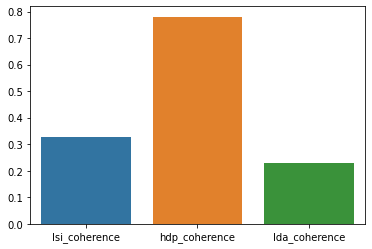

In [ ]:
import seaborn as sns

coherences = [lsi_coherence, hdp_coherence, lda_coherence]
n = len(coherences)
x = ['lsi_coherence','hdp_coherence', 'lda_coherence']
sns.barplot(x, coherences)


We can see that the **LdaModel** model **with 8 topics** has the higher value of
coherence ?????? **[HY: 실제 결과에 따라 수정 필요]**

Examine the keyword to get the topics of the best model

In [ ]:
display_topics(ldamodel)

Let´s check the keyword when we selecting another number of topics (14)

In [ ]:
ldamodel_16 =lmlist[16]

In [ ]:
display_topics(ldamodel_16)

##**Classifiying all documents**

*  now that we have been select the best model and topics number, is time to assign a topic to each document, means cluster according to the topics



In [ ]:
def format_topics_sentences(ldamodel=0, corpus=corpus, texts=0):
    # Init output
    sent_topics_df = pd.DataFrame()-n

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel, corpus=corpus, texts=df_news['texto'].to_list()) #HY: text -> texto

In [ ]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(500)

We selected the ldamodel with 12 topics and asigned a dominant topic to each document, now let map each topic with a label 

first let's create the dictionary

In [ ]:
label_dicc = {0:'TEMA1', 1:'TEMA2', 2:'TEMA3', 3: 'TEMA4', 4:'TEMA5', 5:'TEMA6', 6:'TEMA7', 
              7:'TEMA8', 8:'TEMA9', 9: 'TEMA10', 10:'TEMA11', 11:'TEMA12'}   #HY: 다시 설정 필요!!

In [ ]:
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].astype('int64')

In [ ]:
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].map(label_dicc)
#df_dominant_topic.head(10)
df_dominant_topic

In [ ]:
df_news['labels'] = df_dominant_topic['Dominant_Topic']

Let's examine some text and its topics.

In [ ]:
#df_news[['texto2', 'labels']].head(10)
df_news[['texto2', 'labels']]

In [ ]:
#df_news[ df_news['labels'] == 'family'].head().texto2 #HY: text -> texto
df_news[ df_news['labels'] == 'TEMA5'].head().texto2 #HY: text -> texto

**Let's see the distribution of topics.**

In [ ]:
ax = df_dominant_topic['Dominant_Topic'].value_counts().plot(kind='bar')
plt.show()

The topis are almost balanced, so we are good

finally that we have our models set up, as well as analyzed, we can go ahead to visualizing them.

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis
pyLDAvis.enable_notebook()

In [ ]:
import pyLDAvis.gensim
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)